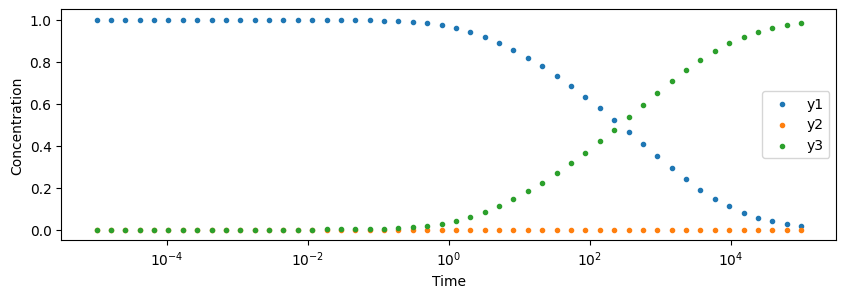

In [70]:
import torch
import torch.nn as nn
import torchdiffeq
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define ROBER problem
k1 = 0.04
k2 = 3e7
k3 = 1e4

def rober(t, y):  # Corrected argument order
    y1, y2, y3 = y
    dydt = [-k1*y1 + k3*y2*y3,
            k1*y1 - k2*y2**2 - k3*y2*y3,
            k2*y2**2]
    return dydt

# Initial conditions
y_0 = [1, 0, 0]
t_span = (1e-5, 1e5)

# Solve using solve_ivp
sol = solve_ivp(rober, t_span, y_0, method='BDF', t_eval=np.logspace(-5, 5, 50))

# Plot the results
plt.figure(figsize=(10,3))
plt.scatter(sol.t, sol.y[0], marker='.', label='y1')
plt.scatter(sol.t, sol.y[1], marker='.', label='y2')
plt.scatter(sol.t, sol.y[2], marker='.', label='y3')
plt.xscale('log')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.legend()
plt.show()


In [80]:
class ODEFunc(nn.Module):

    def __init__(self):
        super(ODEFunc, self).__init__()

        self.input = nn.Linear(3, 50)
        self.output = nn.Linear(50, 3)
        
    def forward(self, t,x):
        x = self.input(x)
        x = torch.tanh(x)
        x = self.output(x)
        return x

model  = ODEFunc()
optimizer = torch.optim.Adam(model.parameters(), lr=0.005)
criterion = nn.MSELoss()

# Convert numpy arrays to torch tensors
t = torch.tensor(sol.t, dtype=torch.float32)
y = torch.tensor(sol.y.T, dtype=torch.float32)
y_0 = torch.tensor(y_0, dtype=torch.float32)

# Train the model
for epoch in range(1000):
    optimizer.zero_grad()
    y_pred = torchdiffeq.odeint(model, y_0, t)
    loss = criterion(y_pred, y)
    loss.backward()
    optimizer.step()
    print(f'Epoch {epoch} Loss: {loss.item()}') 

/tmp/ipykernel_33964/270465787.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_0 = torch.tensor(y_0, dtype=torch.float32)


Epoch 0 Loss: 4.527186393737793


KeyboardInterrupt: 